# ECE 697AM - Project 2
# Name: Haozhe Shu

This project has two parts. In the first part, you are asked to train and compare classifiers on a given dataset. In the second part, you are asked to find and prepare your own dataset and train suitable classifier.

The API reference for scikit-learn is available at: https://scikit-learn.org/stable/modules/classes.html

# Part 1: Health Dataset

## Part 1-1: Loading Data

This part of the project uses a biomechanical dataset. The dataset is from https://www.kaggle.com/caesarlupum/vertebralcolumndataset Please see that website for a detailed description of the data. The data represents biomechanical features, which could be measured by a embedded medical system, to classify orthopaedic patients according to the condition of their spine. Being able to predict the correct classes based on these biomedical features might help in treating patients or avoiding more invasive tests. 

In [71]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join("images", fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

The following shows some basic information about the dataset.

In [72]:
import pandas as pd

bio_data = pd.read_csv(os.path.join("files","projects","datasets","biomechanical","biomechanical_3C.csv"))
bio_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [73]:
bio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [74]:
bio_data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [75]:
bio_data.describe(include = 'object')

,class
count,310
unique,3
top,Spondylolisthesis
freq,150


The ML problem we are trying to solve is to predict the patient class using the numeric feature inputs. How many input features does this dataset provide?

Answer: 6

How many classes are represented in this dataset?

Answer: 3

## Part 1-2: Preparing Data for ML
The following code prepares the data for our ML activites.

In [76]:
X, y = bio_data[["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", 
                 "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]], bio_data[["class"]]

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Write the code to perform any necessary transformations on the input and output values. Name the outputs of these transformations X_train_tr and y_train_tr.

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

grid_pipeline = Pipeline([('std_scaler', StandardScaler())])

X_train_tr = grid_pipeline.fit_transform(X_train)

#class type data y is transformed with ordinal encoder
encoder = OrdinalEncoder()
y_train_tr = encoder.fit_transform(y_train)

#ravel to fit the input when training
y_train_tr.ravel()

array([2., 2., 1., 1., 2., 2., 2., 0., 2., 0., 2., 0., 0., 1., 0., 2., 2.,
       2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 0., 2., 2., 1., 1., 2.,
       0., 0., 1., 1., 2., 2., 1., 0., 0., 0., 2., 1., 2., 2., 2., 0., 2.,
       2., 1., 2., 0., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2.,
       2., 1., 1., 2., 0., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 0.,
       2., 2., 2., 2., 1., 1., 2., 2., 0., 2., 1., 2., 1., 2., 2., 1., 1.,
       2., 2., 2., 1., 2., 0., 0., 0., 2., 2., 1., 2., 2., 0., 2., 1., 2.,
       1., 0., 2., 1., 2., 0., 1., 2., 1., 0., 1., 1., 2., 2., 1., 2., 2.,
       2., 0., 2., 2., 1., 1., 1., 0., 1., 2., 1., 0., 1., 0., 2., 0., 1.,
       2., 1., 1., 2., 2., 1., 2., 2., 1., 0., 2., 1., 2., 0., 1., 2., 0.,
       2., 1., 1., 2., 0., 1., 2., 2., 1., 2., 1., 0., 1., 1., 1., 2., 0.,
       0., 2., 1., 1., 1., 2., 2., 0., 1., 2., 2., 0., 0., 0., 2., 2., 0.,
       1., 2., 0., 1., 1., 0., 2., 1., 2., 1., 2., 1., 1., 0., 0., 2., 2.,
       1., 2., 2., 0., 0.

Print the first few rows of X_train_tr and y_train_tr.

In [79]:
print(X_train_tr)

[[ 0.63294865  0.50768964  0.44692756  0.4488586  -1.18307392  0.06411647]
 [ 0.51156455 -0.18942352  0.66256327  0.79334738  0.43550848  0.37020317]
 [-0.59323076 -0.01528651 -1.30700744 -0.75132401  0.27734871 -0.61408236]
 ...
 [ 0.29988298 -0.74145468  0.36562835  0.91764812 -1.83848781  0.63729861]
 [-0.50597359 -0.84279999  0.32423763 -0.0451162   0.67652542 -0.72033821]
 [ 0.61662274 -0.3591444   0.56048692  1.05019146 -1.23623963  0.0046236 ]]


In [80]:
print(y_train_tr)

[[2.]
 [2.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [0.]
 [2.]
 [0.]
 [0.]
 [1.]
 [0.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [1.]
 [0.]
 [2.]
 [2.]
 [1.]
 [1.]
 [2.]
 [0.]
 [0.]
 [1.]
 [1.]
 [2.]
 [2.]
 [1.]
 [0.]
 [0.]
 [0.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [2.]
 [1.]
 [2.]
 [0.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [2.]
 [0.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [2.]
 [2.]
 [0.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [0.]
 [0.]
 [0.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [0.]
 [2.]
 [1.]
 [2.]
 [1.]
 [0.]
 [2.]
 [1.]
 [2.]
 [0.]
 [1.]
 [2.]
 [1.]
 [0.]
 [1.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [2.]
 [1.]
 [0.]
 [1.]
 [0.]
 [2.]
 [0.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [1.]
 [0.]
 [2.]
 [1.]
 [2.]
 [0.

## Part 1-3: Train ML Models
In this part, write the code to train three ML models. For each model you should explore the impact of a regularization parameter. The models and the parameter are:

* Logistic Regression Classifier (LogisticRegression): vary parameter C
* Support Vector Machine Classifier (SVC): vary parameter C (you may choose any one kernel function)
* Random Forest Classifier (RandomForestClassifier): vary parameter min_samples_leaf

For each classifier, use a grid search with cross validation (GridSearchCV) to find a good value for the specified parameter. Please name your classifiers sgd_clf, svc_clf, and forest_clf, respectively. For each classifier provide the following:

* Plot a figure showing the grid search score (mean_test_score) vs. the parameter value
* Print the best paramter value
* Print the score (mean_test_score) achieved for the best parameter value
* Print the F1 score for the complete training set (note that sklearn.metrics.f1_score automatically handles multiclass classification)

Note: In order to show evidence that you found a good parameter, you should show a figure that has a "peak" in it. That is, the range of your paramter should be sufficiently large so that it is apparent that the best parameter is indeed an optimum.

You may use the following function for the plot or write your own.

In [81]:
def plot_score(clf, parameter):
    scores_mean = clf.cv_results_[('mean_test_score')]
    plt.style.use('seaborn')
    plt.plot(clf.param_grid[parameter], scores_mean, '-o')

    plt.title("Grid Search", fontsize=20, fontweight='normal')
    plt.xlabel(parameter, fontsize=16)
    plt.ylabel('score', fontsize=16)

The function is invoked with plot_score(clf, 'X'), where clf is the grid search classifier and 'X' is the name of the parameter that was used in the grid search.

### Logistic Regression Classifier

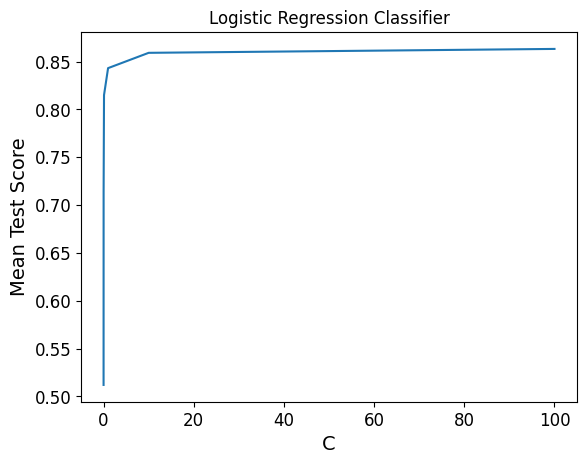

Best C for Logistic Regression: 100
Best Mean Test Score: 0.8631836734693877
F1 Score (Training Set): 0.837244411264568


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

#There are input data format warnings that does not effect the output but occupy the screen. Therefore they are ignored.
import warnings
warnings.filterwarnings("ignore")

#Train the model and determine the best parameter from 0.001 to 100
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
sgd_clf = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
sgd_clf.fit(X_train_tr, y_train_tr)

#Print the graph with parameters as its x axis and mean test score as its y axis
plt.plot(param_grid['C'], sgd_clf.cv_results_['mean_test_score'])
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.title('Logistic Regression Classifier')
plt.show()

#Print the parameter and scoring results
print("Best C for Logistic Regression:", sgd_clf.best_params_['C'])
print("Best Mean Test Score:", sgd_clf.best_score_)
print("F1 Score (Training Set):", f1_score(y_train_tr, sgd_clf.predict(X_train_tr), average='macro'))

### SVM Classifier

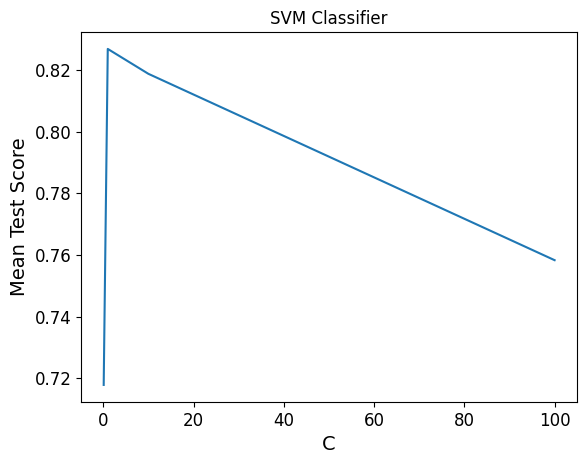

Best C for SVM: 1
Best Mean Test Score: 0.8268571428571428
F1 Score (Training Set): 0.8515811955275363


In [83]:
from sklearn.svm import SVC

#Train the model and determine the best parameter from 0.1 to 100
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['rbf']}  
svc_clf = GridSearchCV(SVC(random_state=42), param_grid, cv=5)
svc_clf.fit(X_train_tr, y_train_tr)

#Print the graph with parameters as its x axis and mean test score as its y axis
plt.plot(param_grid['C'], svc_clf.cv_results_['mean_test_score'])
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.title('SVM Classifier')
plt.show()

#Print the parameter and scoring results
print("Best C for SVM:", svc_clf.best_params_['C'])
print("Best Mean Test Score:", svc_clf.best_score_)
print("F1 Score (Training Set):", f1_score(y_train_tr, svc_clf.predict(X_train_tr), average='macro'))

### Random Forest Classifier

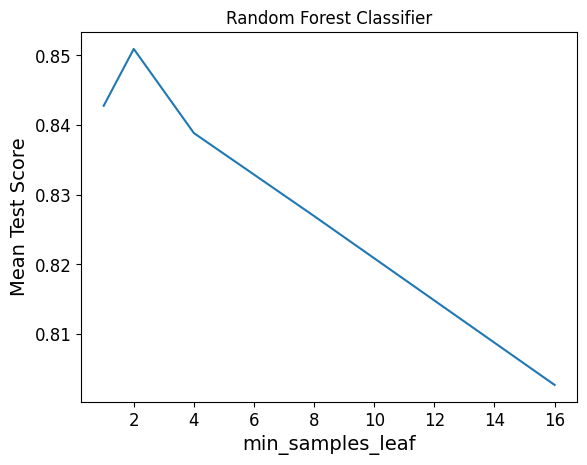

Best min_samples_leaf for Random Forest: 2
Best Mean Test Score: 0.850938775510204
F1 Score (Training Set): 0.9875512733107586


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

#Train the model and determine the best min sample leaf from 1 to 16
param_grid = {'min_samples_leaf': [1, 2, 4, 8, 16]}
forest_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
forest_clf.fit(X_train_tr, y_train_tr)

#Print the graph with min sample leaf as its x axis and mean test score as its y axis
plt.plot(param_grid['min_samples_leaf'], forest_clf.cv_results_['mean_test_score'])
plt.xlabel('min_samples_leaf')
plt.ylabel('Mean Test Score')
plt.title('Random Forest Classifier')
plt.show()

#Print the parameter and scoring results
print("Best min_samples_leaf for Random Forest:", forest_clf.best_params_['min_samples_leaf'])
print("Best Mean Test Score:", forest_clf.best_score_)
print("F1 Score (Training Set):", f1_score(y_train_tr, forest_clf.predict(X_train_tr), average='macro'))

## Part 1-4: Evaluation

In this part, write the code to evaluate the three ML classifiers that you trained previously. Summarize your results in the table.

In [85]:
#transform the testing dataset
X_test_tr = grid_pipeline.fit_transform(X_test)
y_test_tr = encoder.fit_transform(y_test)
y_test_tr.ravel()

#evaluate logistic regression
y_pred_sgd = sgd_clf.predict(X_test_tr)
print("Logistic Regression Performance:")
print("Test Set Accuracy:", sgd_clf.score(X_test_tr, y_test_tr))
print("F1 Score (Testing Set):", f1_score(y_test_tr, y_pred_sgd, average='macro'))

#evaluate SVM
y_pred_svc = svc_clf.predict(X_test_tr)
print("SVM Performance:")
print("Test Set Accuracy:", svc_clf.score(X_test_tr, y_test_tr))
print("F1 Score (Testing Set):", f1_score(y_test_tr, y_pred_svc, average='macro'))

#evaluate random forest
y_pred_forest = forest_clf.predict(X_test_tr)
print("Random Forest Performance:")
print("Test Set Accuracy:", forest_clf.score(X_test_tr, y_test_tr))
print("F1 Score (Testing Set):", f1_score(y_test_tr, y_pred_forest, average='macro'))

Logistic Regression Performance:
Test Set Accuracy: 0.8387096774193549
F1 Score (Testing Set): 0.7607655502392344
SVM Performance:
Test Set Accuracy: 0.8064516129032258
F1 Score (Testing Set): 0.723931623931624
Random Forest Performance:
Test Set Accuracy: 0.7903225806451613
F1 Score (Testing Set): 0.6443228454172366


Provide a summary of your results in this table:

| ML algorithm                       | best parameter       | training dataset F1 score | test dataset F1 score |
| ---------------------------------- | -------------------- | ------------------------- |---------------------- |
| Logistic Regression Classifier     | 100                  | 0.83724                   | 0.76076               |
| Support Vector Machine Classifier  | 1                    | 0.85158                   | 0.72393               |
| Random Forest Classifier           | 2                    | 0.98755                   | 0.64432               |


Provide a brief discussion of your results (1-2 sentences for each classifier):
Overall, the logistic regression classifier performs the best with the most consistent training and testing dataset F1 score and the highest testing F1 score.
 

# Part 2: Your Dataset
## Part 2-1: Find and Perpare Dataset
In this part of the project you are asked for find your own suitable dataset for training a classifier or a regressor. The requirements for the dataset are:

* The dataset must be available on a public website (e.g., https://www.kaggle.com/datasets, https://archive.ics.uci.edu/ml/, etc.).
* The dataset must be suitable for a classification task (binary classification or multiclass classification) or for a regression task. For classification, class labels need to be part of the dataset already. For regression, a numeric value needs to be available for estimation.
* The dataset must contain more than 100 instances and no more than 10,000-100,000 instances.
* The dataset should have a handful (i.e., not hundreds) of features. Do not use datasets with images or time series.

What is the URL to the dataset of your choice? 

Answer: https://archive.ics.uci.edu/dataset/19/car+evaluation

Provide a brief description of the dataset: 

Answer: The dataset provides a few vehcle conditions as variables and provides their evaluation level based on the conditions

Are you using this dataset for classification or for regression?

Answer: classification

Describe the classification task or regression task:

Answer: The task is to classify the vehcles with various conditions to their proper evaluation levels

To prepare the dataset, please save the necessary data in a .csv file. What is the name of your data file? 

Answer: car.csv

## Part 2-2: Train ML System
Write the code to load the data, prepare the data for your ML task, set up an ML system with an algorithm of your choice, and train the ML system. Note that you may drop features from the dataset if you do not want to use them. During training, explore one parameter to find a good choice for that parameter. Repeat this process for at least one additional ML system that uses a different algorithm.

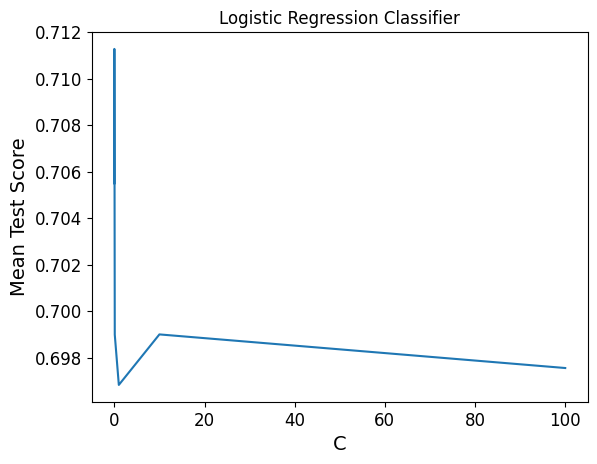

Best C for Logistic Regression: 0.01
Best Mean Test Score: 0.7112828964579082
F1 Score (Training Set): 0.25090121019654965


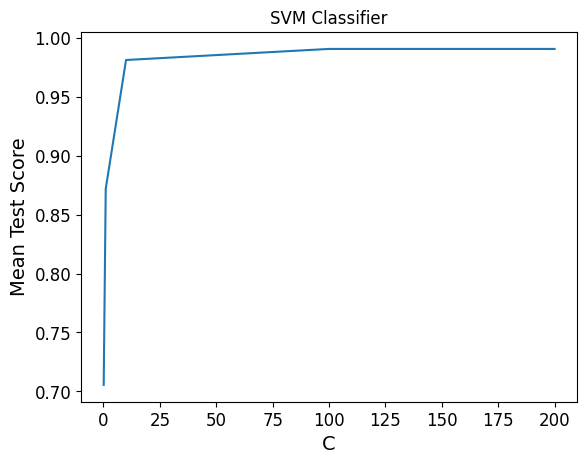

Best C for SVM: 100
Best Mean Test Score: 0.9905901742269659
F1 Score (Training Set): 1.0


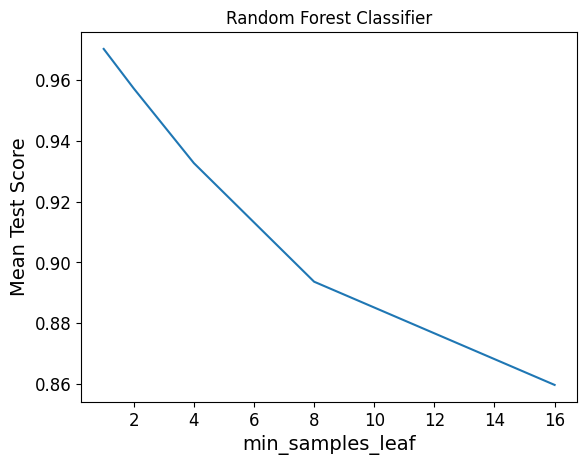

Best min_samples_leaf for Random Forest: 1
Best Mean Test Score: 0.9703186312980693
F1 Score (Training Set): 1.0


In [86]:
#import the dataset
car_data = pd.read_csv(os.path.join("Datasets","car.csv"))

#prepare the datasets
X, y = car_data[["buying", "maint", "doors", "persons", "lug_boot", "safety"]], car_data[["evaluation"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#transform the datasets with ordinal encoder since they are all class data
encoder = OrdinalEncoder()
X_train_tr = encoder.fit_transform(X_train)
y_train_tr = encoder.fit_transform(y_train)

#train the logistic regression classifier
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
sgd_clf = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
sgd_clf.fit(X_train_tr, y_train_tr)

#show the result of sgd classifier
plt.plot(param_grid['C'], sgd_clf.cv_results_['mean_test_score'])
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.title('Logistic Regression Classifier')
plt.show()

print("Best C for Logistic Regression:", sgd_clf.best_params_['C'])
print("Best Mean Test Score:", sgd_clf.best_score_)
print("F1 Score (Training Set):", f1_score(y_train_tr, sgd_clf.predict(X_train_tr), average='macro'))

#train the SVM classifier
param_grid = {'C': [0.1, 1, 10, 100, 200], 'kernel': ['rbf']}  #max C increased to 200 since the best param was 100 during testing
svc_clf = GridSearchCV(SVC(random_state=42), param_grid, cv=5)
svc_clf.fit(X_train_tr, y_train_tr)

#show the result of SVM classifier
plt.plot(param_grid['C'], svc_clf.cv_results_['mean_test_score'])
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.title('SVM Classifier')
plt.show()

print("Best C for SVM:", svc_clf.best_params_['C'])
print("Best Mean Test Score:", svc_clf.best_score_)
print("F1 Score (Training Set):", f1_score(y_train_tr, svc_clf.predict(X_train_tr), average='macro'))

#train the random forest classifier
param_grid = {'min_samples_leaf': [1, 2, 4, 8, 16]}
forest_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
forest_clf.fit(X_train_tr, y_train_tr)

#show the result of random forest classifier
plt.plot(param_grid['min_samples_leaf'], forest_clf.cv_results_['mean_test_score'])
plt.xlabel('min_samples_leaf')
plt.ylabel('Mean Test Score')
plt.title('Random Forest Classifier')
plt.show()

print("Best min_samples_leaf for Random Forest:", forest_clf.best_params_['min_samples_leaf'])
print("Best Mean Test Score:", forest_clf.best_score_)
print("F1 Score (Training Set):", f1_score(y_train_tr, forest_clf.predict(X_train_tr), average='macro'))

Which of the ML systems you tried out will you use for the final evaluation? Why?

I have tried the logistic regression classifier, the SVM classifier, and the random forest classifier. The logistic regression did not work as expected since the lack of numeric data. The SVM and random forest classifier have similar performance and I will evaluate both of their performance below.

## Part 2-3: Evaluate ML System
Write the code to evaluate your ML system.

In [87]:
#transform testing sets
X_test_tr = encoder.fit_transform(X_test)
y_test_tr = encoder.fit_transform(y_test)

#evaluate SVM
y_pred_svc = svc_clf.predict(X_test_tr)
print("SVM Performance:")
print("Test Set Accuracy:", svc_clf.score(X_test_tr, y_test_tr))
print("F1 Score (Testing Set):", f1_score(y_test_tr, y_pred_svc, average='macro'))

#evaluate random forest
y_pred_forest = forest_clf.predict(X_test_tr)
print("Random Forest Performance:")
print("Test Set Accuracy:", forest_clf.score(X_test_tr, y_test_tr))
print("F1 Score (Testing Set):", f1_score(y_test_tr, y_pred_forest, average='macro'))

SVM Performance:
Test Set Accuracy: 0.9884393063583815
F1 Score (Testing Set): 0.9402215654845388
Random Forest Performance:
Test Set Accuracy: 0.9739884393063584
F1 Score (Testing Set): 0.9236425484226891


Write a brief summary about the ML system that you created for your dataset. What worked well and what would you improve in the future?

In [ ]:
"Both SVM classifier and random forest classifier performed well with SVM classifier performs slightly better. I think model-wise, the SVM classifier"
"is performing at a satisfactory level. I would wish to do better in data processing and pickout any outliers that would potentially harm the model"